In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.table import Table, join

In [2]:
rv_df = pd.read_csv('rv_df.csv')
len(rv_df)


33

In [4]:
# observed_112 = [150107004201104, 151230003202196, 161013005401317, 161104004801189,
#                 150829004301285, 160129003601260, 190212001601338, 140311007101261,
#                 170514002101318]

# observed_113 = [140806001701013, 170802003201248, 150429004102159, 170602003701360,
#                 170416004301008, 170906002101305, 160521004801082, 170517004501165,
#                 140707003101315, 161013001601153, 170509005201208, 160519005201081,
#                 140805001501346, 150829002601352, 150428000601308, 170418005701333,
#                 171003002601363, 170801002501304, 170615003401088, 170615003401137,
#                 160327006601149, 160529004201018, 160524006101130, 170911001801179,
#                 170602005701107]

observed_116 = [170218001601395, 160330002101014, 150209002201366, 181226004101033, 
                161117005201340, 151220002201053, 171207004601011, 140414003101275, 
                170511000101155, 170118002701119, 141231004601139, 161117005201310, 
                171208003602294, 181225004601256, 151227004202025, 150207003601226, 
                150108002201367, 140209002201006, 160418003101052, 140314002601106, 
                171031003301151, 170418001601224, 150406001401117, 160426004501355, 170220002601328]

observed_targets = np.concatenate([rv_df.sobject_id.to_numpy(),observed_116])
# P116_targets = pd.read_csv('P116_targets')


In [5]:

def get_paper_sample():
    df      = Table.read('../../lithium/final_paper_sample_09_18.csv')
    return df

paper_sample = get_paper_sample()
paper_sample_pd = paper_sample.to_pandas()

In [ ]:
# def get_galah():
#     galah =(Table.read('../../lithium/data/GALAH_DR3_main_allstar_v2.fits',format='fits'))#.to_pandas()

#     dr2_ids = np.array(galah['dr2_source_id']).astype('str')
#     dr3_ids = np.array(galah['dr3_source_id']).astype('str')
    
#     galah.remove_column('dr2_source_id')
#     galah.remove_column('dr3_source_id')
#     galah = galah.to_pandas()

#     galah.insert(2, 'dr2_source_id', dr2_ids)
#     galah.insert(3, 'dr3_source_id', dr3_ids)
    
#     galah['ph_qual_wise']=galah['ph_qual_wise'].str.decode("utf-8")
#     return galah

# galah=get_galah()

In [6]:
galah_pd = (Table.read('../../lithium/data/GALAH_DR3_main_allstar_v2.fits',format='fits')).to_pandas()

In [ ]:
# paper_sample_pd = paper_sample_pd[~paper_sample_pd['galah_rich_id'].isin(observed_targets)]




In [7]:
galah1 = galah_pd[galah_pd.sobject_id.isin(paper_sample_pd.galah_rich_id)]
print(len(galah1))
galah1 = galah1[~galah1.sobject_id.isin(observed_targets)]
print(len(galah1))


1099
1042


,sobject_id,Li_val
16,140707003101315,1.54
9,170802003201248,1.56
25,170801002501304,1.58
30,160524006101130,1.64
18,170509005201208,1.64
23,170418005701333,1.65
31,170911001801179,1.69
20,140805001501346,1.73
4,150829004301285,1.79
7,170514002101318,1.86


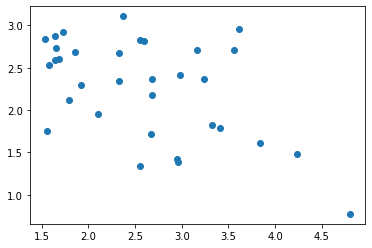

In [15]:
# galah_left = galah_pd[galah_pd.sobject_id.isin(paper_sample_pd.galah_rich_id)]
galah_rg = galah1[galah1.logg<2.]

set(galah_rg.sobject_id) & set(observed_targets)
plt.scatter(rv_df.Li_val, rv_df.logg)
rv_df[['sobject_id','Li_val']].sort_values(by=['Li_val'])

In [20]:


galah_rg['Li_val'] = galah_rg['fe_h'] + galah_rg['Li_fe'] + 1.05
galah_rg[['sobject_id','Li_val']].sort_values(by=['Li_val'])
# 170416004301008

<ipython-input-20-4adac4a8370c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  galah_rg['Li_val'] = galah_rg['fe_h'] + galah_rg['Li_fe'] + 1.05


,sobject_id,Li_val
453587,170517002801180,1.501666
381040,170216003801146,1.508881
525817,171003002101124,1.509112
141209,150606002901147,1.522905
420207,170418005201064,1.526737
...,...,...
310829,161011004001084,3.026639
486061,170713004601106,3.227304
417443,170417005501279,3.955314
260052,160519004601118,4.193099


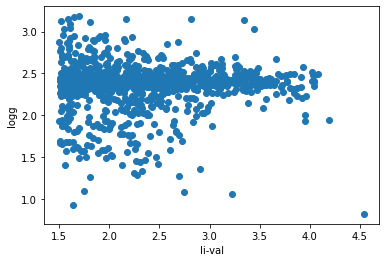

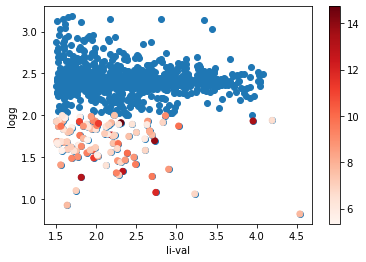

In [31]:
plt.figure()
ax=plt.subplot(111)
plt.scatter(galah1.fe_h+galah1.Li_fe+1.05,galah1.logg)#,c=galah_left.vbroad)
plt.xlabel('li-val')
plt.ylabel('logg')


plt.figure()
ax1=plt.subplot(111)
plt.scatter(galah1.fe_h+galah1.Li_fe+1.05,galah1.logg)#,c=galah_left.vbroad)
plt.scatter(galah_rg.fe_h+galah_rg.Li_fe+1.05,galah_rg.logg,c=galah_rg.vbroad,cmap='Reds')

plt.xlabel('li-val')
plt.ylabel('logg')
plt.colorbar()


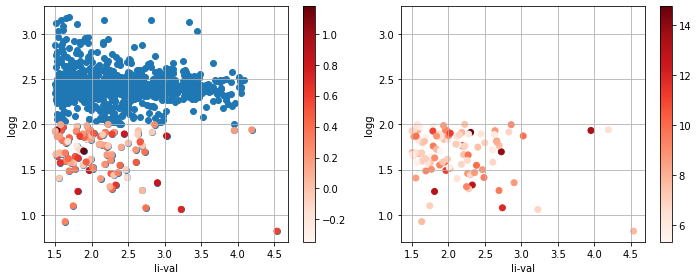

In [81]:

plt.figure(figsize=(10,4))
ax1=plt.subplot(121)
plt.scatter(galah1.fe_h+galah1.Li_fe+1.05,galah1.logg)#,c=galah_left.vbroad)
plt.scatter(galah_rg.fe_h+galah_rg.Li_fe+1.05,galah_rg.logg,c=galah_rg.Ba_fe,cmap='Reds')
plt.grid()

plt.xlabel('li-val')
plt.ylabel('logg')
plt.colorbar()


plt.subplot(122, sharex=ax1,sharey=ax1)
plt.scatter(galah_rg.fe_h+galah_rg.Li_fe+1.05,galah_rg.logg,c=galah_rg.vbroad,cmap='Reds')
plt.xlabel('li-val')
plt.ylabel('logg')
plt.grid()
plt.colorbar()
plt.tight_layout()

,sobject_id,Li_val,vbroad,logg,ruwe_dr2,teff,fe_h,Ba_fe
405673,170413002101113,1.891372,5.339177,1.706065,1.010206,4435.903320,-0.519445,1.160959
420207,170418005201064,1.526737,6.481310,1.938749,1.162536,4733.632324,-0.772981,1.177290


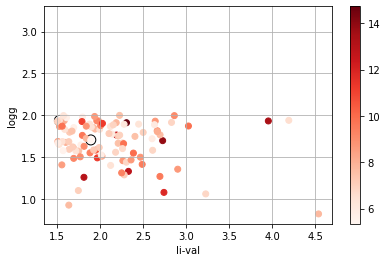

In [84]:
li1, li2 = 1.5,2
lo1, lo2 = 1.5,2.

cols = ['sobject_id','Li_val', 'vbroad','logg','ruwe_dr2','teff','fe_h','Ba_fe']

dtemp = galah_rg[(galah_rg.Li_val>=li1) & 
         (galah_rg.Li_val<=li2) & 
         (galah_rg.logg>=lo1) & 
         (galah_rg.logg<=lo2) & (galah_rg.Ba_fe>1)
        ][cols]
plt.subplot(111, sharex=ax1,sharey=ax1)
plt.scatter(dtemp.Li_val,dtemp.logg,ec='k',fc='None',s=100)

plt.scatter(galah_rg.fe_h+galah_rg.Li_fe+1.05,galah_rg.logg,c=galah_rg.vbroad,cmap='Reds')

plt.xlabel('li-val')
plt.ylabel('logg')
plt.grid()
plt.colorbar()
plt.tight_layout()

dtemp

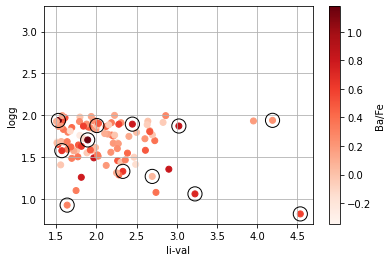

In [86]:
# Li = 2.5-3., RUWE > 1.2
160513003101106, 

# Lival > 3.5 but lower vbroad: 
160519004601118, 170509003201177

# Li = 3-3.5, logg~1
170713004601106

# Li = 3-3.5, logg~2
161011004001084

# Li = 1-1.5, logg<1
140412002201386

# Li = 1.5, logg~2
170418005201064

# Li ~ 2, logg~2
170904000101358

# Li = 2-2.5, logg~2
170129002601068

# Li = 2-2.5, logg~1
140711004402304

# Li = 1.5-2, logg= 1.5-2
160530004501026

# Li = 1.5-2, logg=1.5-2, Ba >1
170413002101113

selection = [160513003101106, 160519004601118,170509003201177,
             170713004601106, 161011004001084,140412002201386,170418005201064,
             170904000101358,170129002601068,140711004402304,160530004501026, 
             170413002101113]

dtemp = galah_rg[galah_rg.sobject_id.isin(selection)]
plt.subplot(111, sharex=ax1,sharey=ax1)
plt.scatter(dtemp.Li_val,dtemp.logg,ec='k',fc='None',s=200,zorder=100)

plt.scatter(galah_rg.fe_h+galah_rg.Li_fe+1.05,galah_rg.logg,c=galah_rg.Ba_fe,cmap='Reds')

plt.xlabel('li-val')
plt.ylabel('logg')
plt.grid()
plt.colorbar(label='Ba/Fe')
plt.tight_layout()


In [131]:
from astropy.coordinates import SkyCoord
from astropy import units as u


old_proposed_again = [161013005401317, 161104004801189, 150829004301285, 160129003601260, 170514002101318, 140806001701013, 160521004801082, 140707003101315, 170509005201208, 170418005701333, 170801002501304, 170615003401088, 160327006601149, 160524006101130]
all_targets_p117 = np.concatenate([old_proposed_again, selection])
# print(all_targets_p117)
cols = ['sobject_id','dr2_source_id','ra_dr2','dec_dr2','v_jk']
new_header = ['name','ra','dec','mag']

final_df = galah_pd[galah_pd.sobject_id.isin(all_targets_p117)][cols]
# final_df.columns = new_header

# final_df.to_csv('p117_targets.txt',index=False)
final_id  = []
final_ra  = []
final_dec = []
final_mag = []
sobject_id = []
for i,row in final_df.iterrows():
    gaia_id = row.dr2_source_id
    ra      = row.ra_dr2
    dec     = row.dec_dr2
    vmag    = row.v_jk
    sid     = row.sobject_id

    c  = SkyCoord(ra, dec, frame='icrs', unit='deg')
    ra = c.ra.to_string(u.hour,sep=":", precision=2)
    c_new = c.to_string(style='hmsdms',precision=2)
    ra, dec = c_new.split(' ')
    ra= ra.replace('h',':')
    ra=ra.replace('m',':')
    ra=ra.replace('s','')
    dec=dec.replace('d',':')
    dec=dec.replace('m',':')
    dec=dec.replace('s','')
    sobject_id.append(sid)
    
    #dec = c.dec.to_string(u.degree, alwayssign=True,sep=":", precision=1)
#     sobject_id.append(row.sobject_id)
    final_ra.append(ra)
    final_dec.append(dec)
    final_mag.append('(V=%.1f)'%vmag)
    final_id.append(gaia_id)
data = {'sid':sobject_id,'Name':final_id,'RA':final_ra,'Dec':final_dec,'Mag':final_mag}
data = pd.DataFrame(data)

data
# data.to_csv('p117_targets.txt',index=False)
data

,sid,Name,RA,Dec,Mag
0,140412002201386,6005562717428070400,15:23:21.97,-41:22:30.38,(V=12.2)
1,140707003101315,2622883652325301248,22:29:03.81,-06:25:24.53,(V=13.0)
2,140711004402304,4634627951312830464,00:27:21.62,-79:37:45.91,(V=12.1)
3,140806001701013,5909827209206002688,17:44:19.64,-62:20:33.23,(V=13.9)
4,150829004301285,6579575475802939392,21:29:25.24,-40:08:55.43,(V=13.0)
5,160129003601260,2899390245231067136,06:19:58.81,-27:20:13.77,(V=13.2)
6,160327006601149,5921614759823693824,17:32:33.36,-53:35:03.18,(V=10.9)
7,160513003101106,4356439243065219584,16:12:27.79,-04:43:53.45,(V=12.8)
8,160519004601118,6036124673919844352,16:04:32.95,-32:52:08.64,(V=13.9)
9,160521004801082,6668577437377879040,20:29:16.13,-47:41:51.59,(V=13.7)
